# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 36kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

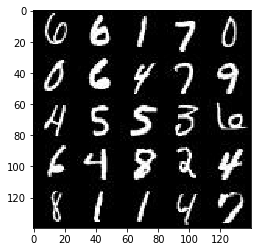

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

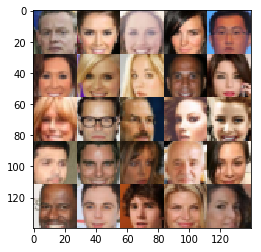

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(dtype=tf.float32, shape=(None, image_width, image_height, image_channels), name="input_real")
    input_z = tf.placeholder(dtype=tf.float32, shape=(None, z_dim), name="input_z")
    learning_rate = tf.placeholder(dtype=tf.float32, shape=None, name="learning_rate")
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 497, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start\n    handler_func(fd_obj, events)', 'File "/opt/conda/lib/

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [6]:
def discriminator(images, reuse=False, alpha=0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope("discriminator", reuse=reuse):
        # input images 28*28*3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding="same")
        relu1 = tf.maximum(alpha * x1, x1)
#         print(relu1.shape)
        # 14*14*64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding="same")
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
#         print(relu2.shape)
        # 7*7*128
        
        x3 = tf.layers.conv2d(relu2, 256, 2, strides=2, padding="same")
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
#         print(relu3.shape)
        # 4*4*256

        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.nn.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [7]:
def generator(z, out_channel_dim, is_train=True, alpha=0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope("generator", reuse=not is_train):
        x1 = tf.layers.dense(z, 3*3*256)
        x1 = tf.reshape(x1, (-1, 3, 3, 256))
        bn1 = tf.layers.batch_normalization(x1, training=is_train)
        relu1 = tf.maximum(alpha * bn1, bn1)
#         print(relu1.shape)
        # 3*3*256
        
        x2 = tf.layers.conv2d_transpose(relu1, 128, 3, strides=2, padding="valid")
        bn2 = tf.layers.batch_normalization(x2, training=is_train)
        relu2 = tf.maximum(alpha * bn2, bn2)
#         print(relu2.shape)
        # 7*7*128
        
        x3 = tf.layers.conv2d_transpose(relu2, 64, 5, strides=2, padding="same")
        bn3 = tf.layers.batch_normalization(x3, training=is_train)
        relu3 = tf.maximum(alpha * bn3, bn3)
#         print(relu3.shape)
        # 14*14*64
        
        logits = tf.layers.conv2d_transpose(relu3, out_channel_dim, 5, strides=2, padding="same")
#         print(logits.shape)
        # 28*28*3
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim, alpha=0.2, smooth=0.1):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True, alpha=alpha)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False, alpha=alpha)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True, alpha=alpha)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=tf.ones_like(d_logits_real) * (1 - smooth)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=tf.zeros_like(d_logits_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith("discriminator")]
    g_vars = [var for var in t_vars if var.name.startswith("generator")]
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode, alpha=0.2, smooth=0.1):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_real, input_z, _ = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3], alpha=alpha, smooth=smooth)
    d_train_opt, g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    step = 0
    show_every = 100
    print_every = 10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                step += 1
                
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_train_opt, feed_dict={input_real:batch_images, input_z:batch_z})
                _ = sess.run(g_train_opt, feed_dict={input_z:batch_z})
                
                if step % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if step % show_every == 0:
                    show_generator_output(sess, 25, input_z, data_shape[3], data_image_mode)


### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 1.0644... Generator Loss: 0.7918
Epoch 1/2... Discriminator Loss: 1.5154... Generator Loss: 5.1698
Epoch 1/2... Discriminator Loss: 0.9715... Generator Loss: 0.9553
Epoch 1/2... Discriminator Loss: 0.7419... Generator Loss: 2.6609
Epoch 1/2... Discriminator Loss: 0.9472... Generator Loss: 1.2198
Epoch 1/2... Discriminator Loss: 1.4053... Generator Loss: 2.9775
Epoch 1/2... Discriminator Loss: 1.2401... Generator Loss: 0.7611
Epoch 1/2... Discriminator Loss: 0.9366... Generator Loss: 1.3481
Epoch 1/2... Discriminator Loss: 1.0337... Generator Loss: 2.4191
Epoch 1/2... Discriminator Loss: 0.8123... Generator Loss: 1.3981


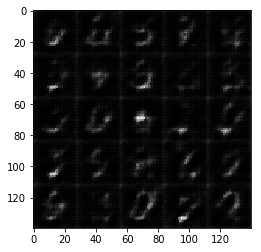

Epoch 1/2... Discriminator Loss: 0.9591... Generator Loss: 1.0567
Epoch 1/2... Discriminator Loss: 0.9024... Generator Loss: 1.2234
Epoch 1/2... Discriminator Loss: 1.3081... Generator Loss: 0.7476
Epoch 1/2... Discriminator Loss: 1.5354... Generator Loss: 0.4818
Epoch 1/2... Discriminator Loss: 1.1797... Generator Loss: 0.6920
Epoch 1/2... Discriminator Loss: 0.9110... Generator Loss: 1.1721
Epoch 1/2... Discriminator Loss: 0.9322... Generator Loss: 1.8582
Epoch 1/2... Discriminator Loss: 1.0035... Generator Loss: 0.9592
Epoch 1/2... Discriminator Loss: 0.9092... Generator Loss: 1.2490
Epoch 1/2... Discriminator Loss: 1.1694... Generator Loss: 1.7395


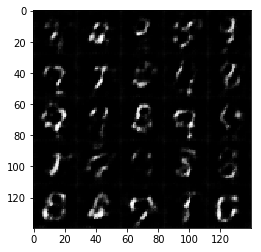

Epoch 1/2... Discriminator Loss: 0.8881... Generator Loss: 1.5411
Epoch 1/2... Discriminator Loss: 1.2953... Generator Loss: 2.5226
Epoch 1/2... Discriminator Loss: 1.0422... Generator Loss: 1.0502
Epoch 1/2... Discriminator Loss: 1.3539... Generator Loss: 0.5591
Epoch 1/2... Discriminator Loss: 1.3217... Generator Loss: 0.6298
Epoch 1/2... Discriminator Loss: 0.9220... Generator Loss: 1.0523
Epoch 1/2... Discriminator Loss: 1.0806... Generator Loss: 1.3180
Epoch 1/2... Discriminator Loss: 0.9896... Generator Loss: 1.1942
Epoch 1/2... Discriminator Loss: 1.3247... Generator Loss: 0.6116
Epoch 1/2... Discriminator Loss: 1.0032... Generator Loss: 1.0851


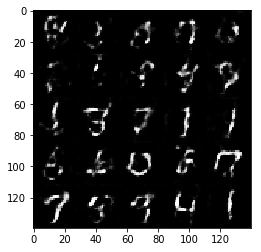

Epoch 1/2... Discriminator Loss: 1.0712... Generator Loss: 1.2404
Epoch 1/2... Discriminator Loss: 1.1372... Generator Loss: 0.7677
Epoch 1/2... Discriminator Loss: 1.0478... Generator Loss: 1.0268
Epoch 1/2... Discriminator Loss: 1.3337... Generator Loss: 0.6082
Epoch 1/2... Discriminator Loss: 1.0681... Generator Loss: 1.1116
Epoch 1/2... Discriminator Loss: 1.3583... Generator Loss: 0.5440
Epoch 1/2... Discriminator Loss: 1.2304... Generator Loss: 0.6374
Epoch 1/2... Discriminator Loss: 1.1017... Generator Loss: 0.8132
Epoch 1/2... Discriminator Loss: 1.1120... Generator Loss: 2.2425
Epoch 1/2... Discriminator Loss: 1.1024... Generator Loss: 0.8790


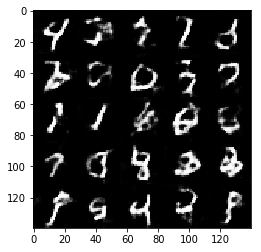

Epoch 1/2... Discriminator Loss: 0.9731... Generator Loss: 1.6556
Epoch 1/2... Discriminator Loss: 1.2163... Generator Loss: 0.6251
Epoch 1/2... Discriminator Loss: 0.8981... Generator Loss: 1.3144
Epoch 1/2... Discriminator Loss: 1.4381... Generator Loss: 0.5039
Epoch 1/2... Discriminator Loss: 1.0992... Generator Loss: 1.0685
Epoch 1/2... Discriminator Loss: 1.1419... Generator Loss: 0.8003
Epoch 1/2... Discriminator Loss: 1.0439... Generator Loss: 1.0557
Epoch 1/2... Discriminator Loss: 1.0326... Generator Loss: 0.9893
Epoch 1/2... Discriminator Loss: 1.4711... Generator Loss: 2.7043
Epoch 1/2... Discriminator Loss: 1.1381... Generator Loss: 1.1048


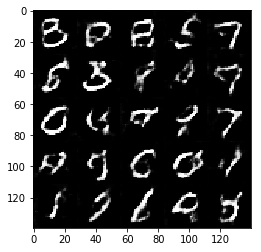

Epoch 1/2... Discriminator Loss: 0.9843... Generator Loss: 0.9533
Epoch 1/2... Discriminator Loss: 1.0989... Generator Loss: 0.8238
Epoch 1/2... Discriminator Loss: 1.0776... Generator Loss: 1.1237
Epoch 1/2... Discriminator Loss: 1.0629... Generator Loss: 0.8993
Epoch 1/2... Discriminator Loss: 1.0645... Generator Loss: 1.4022
Epoch 1/2... Discriminator Loss: 1.1678... Generator Loss: 0.6745
Epoch 1/2... Discriminator Loss: 1.0178... Generator Loss: 1.3846
Epoch 1/2... Discriminator Loss: 1.1495... Generator Loss: 0.9751
Epoch 1/2... Discriminator Loss: 1.1382... Generator Loss: 0.7510
Epoch 1/2... Discriminator Loss: 1.0923... Generator Loss: 1.6033


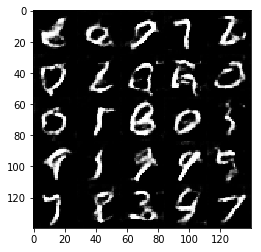

Epoch 1/2... Discriminator Loss: 1.0983... Generator Loss: 1.4044
Epoch 1/2... Discriminator Loss: 1.1218... Generator Loss: 0.7731
Epoch 1/2... Discriminator Loss: 1.1448... Generator Loss: 0.8072
Epoch 1/2... Discriminator Loss: 1.2192... Generator Loss: 0.6586
Epoch 1/2... Discriminator Loss: 1.2475... Generator Loss: 0.6423
Epoch 1/2... Discriminator Loss: 0.9931... Generator Loss: 1.0414
Epoch 1/2... Discriminator Loss: 0.9770... Generator Loss: 1.4484
Epoch 1/2... Discriminator Loss: 0.9948... Generator Loss: 1.3108
Epoch 1/2... Discriminator Loss: 1.2413... Generator Loss: 0.7317
Epoch 1/2... Discriminator Loss: 1.4350... Generator Loss: 0.4967


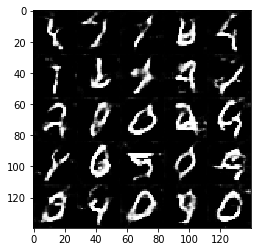

Epoch 1/2... Discriminator Loss: 1.0824... Generator Loss: 1.0431
Epoch 1/2... Discriminator Loss: 1.4898... Generator Loss: 2.1817
Epoch 1/2... Discriminator Loss: 1.0528... Generator Loss: 1.2710
Epoch 1/2... Discriminator Loss: 0.9724... Generator Loss: 1.2153
Epoch 1/2... Discriminator Loss: 0.9469... Generator Loss: 1.1945
Epoch 1/2... Discriminator Loss: 1.1232... Generator Loss: 0.7551
Epoch 1/2... Discriminator Loss: 1.0536... Generator Loss: 0.8651
Epoch 1/2... Discriminator Loss: 1.0174... Generator Loss: 1.9164
Epoch 1/2... Discriminator Loss: 0.9257... Generator Loss: 1.1326
Epoch 1/2... Discriminator Loss: 1.5319... Generator Loss: 0.4681


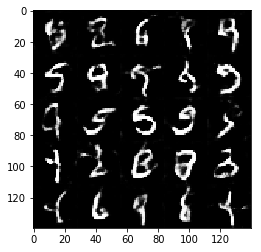

Epoch 1/2... Discriminator Loss: 1.0056... Generator Loss: 1.2610
Epoch 1/2... Discriminator Loss: 1.5714... Generator Loss: 0.4082
Epoch 1/2... Discriminator Loss: 1.1264... Generator Loss: 2.3145
Epoch 1/2... Discriminator Loss: 1.3072... Generator Loss: 0.6151
Epoch 1/2... Discriminator Loss: 0.9395... Generator Loss: 1.6939
Epoch 1/2... Discriminator Loss: 1.4110... Generator Loss: 2.3749
Epoch 1/2... Discriminator Loss: 1.0706... Generator Loss: 1.2389
Epoch 1/2... Discriminator Loss: 0.9713... Generator Loss: 1.3793
Epoch 1/2... Discriminator Loss: 1.0827... Generator Loss: 0.8690
Epoch 1/2... Discriminator Loss: 1.0790... Generator Loss: 0.7450


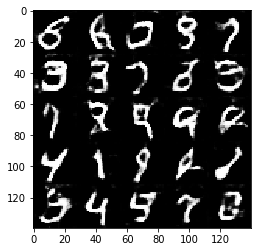

Epoch 1/2... Discriminator Loss: 1.1496... Generator Loss: 0.8394
Epoch 1/2... Discriminator Loss: 1.0741... Generator Loss: 0.8576
Epoch 1/2... Discriminator Loss: 1.3795... Generator Loss: 0.5356
Epoch 2/2... Discriminator Loss: 1.4109... Generator Loss: 1.8557
Epoch 2/2... Discriminator Loss: 1.0323... Generator Loss: 1.2807
Epoch 2/2... Discriminator Loss: 1.4322... Generator Loss: 0.5444
Epoch 2/2... Discriminator Loss: 1.0634... Generator Loss: 1.2298
Epoch 2/2... Discriminator Loss: 1.0326... Generator Loss: 0.9108
Epoch 2/2... Discriminator Loss: 1.0334... Generator Loss: 1.2189
Epoch 2/2... Discriminator Loss: 1.0673... Generator Loss: 0.9396


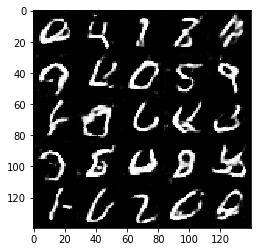

Epoch 2/2... Discriminator Loss: 0.9060... Generator Loss: 1.5196
Epoch 2/2... Discriminator Loss: 0.9905... Generator Loss: 1.0651
Epoch 2/2... Discriminator Loss: 1.2930... Generator Loss: 0.6029
Epoch 2/2... Discriminator Loss: 1.6202... Generator Loss: 3.0036
Epoch 2/2... Discriminator Loss: 1.0738... Generator Loss: 2.0589
Epoch 2/2... Discriminator Loss: 1.1188... Generator Loss: 0.7701
Epoch 2/2... Discriminator Loss: 1.1997... Generator Loss: 0.6489
Epoch 2/2... Discriminator Loss: 0.9968... Generator Loss: 1.6362
Epoch 2/2... Discriminator Loss: 1.1250... Generator Loss: 0.7979
Epoch 2/2... Discriminator Loss: 1.0275... Generator Loss: 1.0677


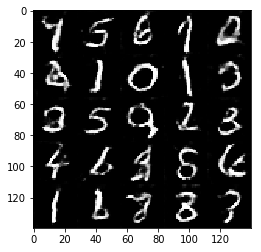

Epoch 2/2... Discriminator Loss: 1.7122... Generator Loss: 0.3615
Epoch 2/2... Discriminator Loss: 0.9716... Generator Loss: 1.6118
Epoch 2/2... Discriminator Loss: 1.3502... Generator Loss: 0.5518
Epoch 2/2... Discriminator Loss: 1.4693... Generator Loss: 0.4871
Epoch 2/2... Discriminator Loss: 0.9812... Generator Loss: 1.0894
Epoch 2/2... Discriminator Loss: 1.2267... Generator Loss: 0.6096
Epoch 2/2... Discriminator Loss: 1.3111... Generator Loss: 1.9752
Epoch 2/2... Discriminator Loss: 0.9803... Generator Loss: 1.1072
Epoch 2/2... Discriminator Loss: 2.6894... Generator Loss: 4.0549
Epoch 2/2... Discriminator Loss: 1.0884... Generator Loss: 0.8879


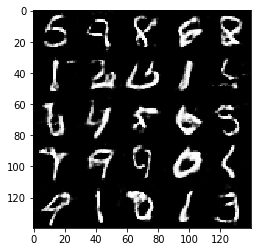

Epoch 2/2... Discriminator Loss: 1.0981... Generator Loss: 0.7519
Epoch 2/2... Discriminator Loss: 1.4739... Generator Loss: 2.4066
Epoch 2/2... Discriminator Loss: 0.8904... Generator Loss: 1.2630
Epoch 2/2... Discriminator Loss: 0.8892... Generator Loss: 1.0782
Epoch 2/2... Discriminator Loss: 1.0356... Generator Loss: 0.8900
Epoch 2/2... Discriminator Loss: 1.0541... Generator Loss: 1.0365
Epoch 2/2... Discriminator Loss: 1.6060... Generator Loss: 0.3949
Epoch 2/2... Discriminator Loss: 1.0615... Generator Loss: 0.9108
Epoch 2/2... Discriminator Loss: 1.2607... Generator Loss: 1.2201
Epoch 2/2... Discriminator Loss: 0.9366... Generator Loss: 1.2144


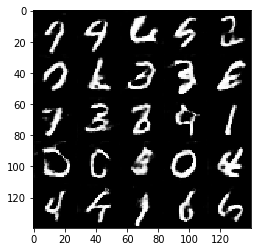

Epoch 2/2... Discriminator Loss: 1.0367... Generator Loss: 1.0718
Epoch 2/2... Discriminator Loss: 1.2734... Generator Loss: 0.5743
Epoch 2/2... Discriminator Loss: 0.9421... Generator Loss: 1.8227
Epoch 2/2... Discriminator Loss: 0.9824... Generator Loss: 0.9747
Epoch 2/2... Discriminator Loss: 1.2727... Generator Loss: 0.6043
Epoch 2/2... Discriminator Loss: 0.9728... Generator Loss: 0.9465
Epoch 2/2... Discriminator Loss: 1.1448... Generator Loss: 1.6582
Epoch 2/2... Discriminator Loss: 1.2954... Generator Loss: 0.5575
Epoch 2/2... Discriminator Loss: 0.9712... Generator Loss: 1.5326
Epoch 2/2... Discriminator Loss: 1.1473... Generator Loss: 2.1794


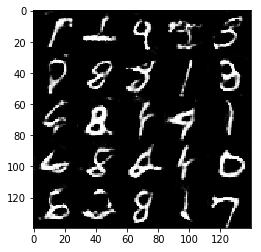

Epoch 2/2... Discriminator Loss: 0.9907... Generator Loss: 1.1335
Epoch 2/2... Discriminator Loss: 0.9695... Generator Loss: 0.9900
Epoch 2/2... Discriminator Loss: 0.9693... Generator Loss: 1.3043
Epoch 2/2... Discriminator Loss: 0.8816... Generator Loss: 1.3924
Epoch 2/2... Discriminator Loss: 1.2430... Generator Loss: 0.6526
Epoch 2/2... Discriminator Loss: 0.9926... Generator Loss: 0.9283
Epoch 2/2... Discriminator Loss: 0.8198... Generator Loss: 1.2004
Epoch 2/2... Discriminator Loss: 1.1107... Generator Loss: 0.7823
Epoch 2/2... Discriminator Loss: 0.8235... Generator Loss: 1.5392
Epoch 2/2... Discriminator Loss: 0.9552... Generator Loss: 0.9239


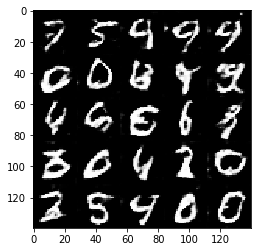

Epoch 2/2... Discriminator Loss: 1.1503... Generator Loss: 0.7460
Epoch 2/2... Discriminator Loss: 1.4213... Generator Loss: 2.1501
Epoch 2/2... Discriminator Loss: 1.3529... Generator Loss: 2.3087
Epoch 2/2... Discriminator Loss: 1.0189... Generator Loss: 0.9346
Epoch 2/2... Discriminator Loss: 1.0605... Generator Loss: 1.2697
Epoch 2/2... Discriminator Loss: 1.0046... Generator Loss: 0.8942
Epoch 2/2... Discriminator Loss: 0.8735... Generator Loss: 1.4034
Epoch 2/2... Discriminator Loss: 1.0066... Generator Loss: 0.8687
Epoch 2/2... Discriminator Loss: 1.1202... Generator Loss: 1.0743
Epoch 2/2... Discriminator Loss: 1.1349... Generator Loss: 0.7491


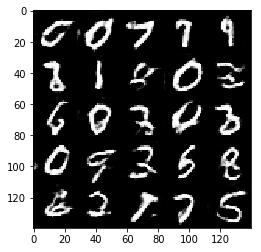

Epoch 2/2... Discriminator Loss: 1.0946... Generator Loss: 0.7939
Epoch 2/2... Discriminator Loss: 1.1580... Generator Loss: 0.7532
Epoch 2/2... Discriminator Loss: 0.9704... Generator Loss: 0.8882
Epoch 2/2... Discriminator Loss: 1.1646... Generator Loss: 0.7100
Epoch 2/2... Discriminator Loss: 1.1653... Generator Loss: 0.7463
Epoch 2/2... Discriminator Loss: 1.4270... Generator Loss: 0.5045
Epoch 2/2... Discriminator Loss: 1.3670... Generator Loss: 2.5291
Epoch 2/2... Discriminator Loss: 1.1362... Generator Loss: 1.2716
Epoch 2/2... Discriminator Loss: 1.0138... Generator Loss: 0.8394
Epoch 2/2... Discriminator Loss: 0.9329... Generator Loss: 0.9780


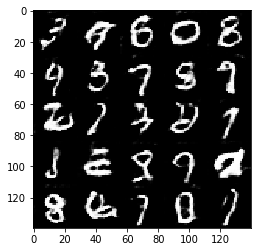

Epoch 2/2... Discriminator Loss: 1.1680... Generator Loss: 1.6813
Epoch 2/2... Discriminator Loss: 1.1503... Generator Loss: 0.7364
Epoch 2/2... Discriminator Loss: 1.0127... Generator Loss: 0.9527
Epoch 2/2... Discriminator Loss: 1.0716... Generator Loss: 0.7831
Epoch 2/2... Discriminator Loss: 0.8472... Generator Loss: 2.7980
Epoch 2/2... Discriminator Loss: 1.2200... Generator Loss: 0.7045
Epoch 2/2... Discriminator Loss: 0.9706... Generator Loss: 0.8888
Epoch 2/2... Discriminator Loss: 1.4341... Generator Loss: 0.4976
Epoch 2/2... Discriminator Loss: 0.9536... Generator Loss: 1.2371
Epoch 2/2... Discriminator Loss: 0.8132... Generator Loss: 1.2979


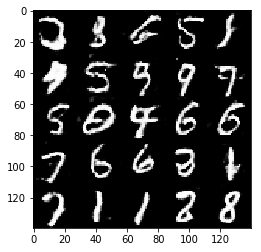

Epoch 2/2... Discriminator Loss: 2.0876... Generator Loss: 0.3304
Epoch 2/2... Discriminator Loss: 0.9295... Generator Loss: 1.0326
Epoch 2/2... Discriminator Loss: 0.7492... Generator Loss: 1.8133
Epoch 2/2... Discriminator Loss: 0.7762... Generator Loss: 1.2433
Epoch 2/2... Discriminator Loss: 1.0004... Generator Loss: 0.8547
Epoch 2/2... Discriminator Loss: 0.9714... Generator Loss: 1.0578
Epoch 2/2... Discriminator Loss: 1.2276... Generator Loss: 0.7022


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.001
beta1 = 0.5
alpha = 0.2
smooth = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode, alpha=alpha, smooth=smooth)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 0.7915... Generator Loss: 1.5523
Epoch 1/1... Discriminator Loss: 0.4206... Generator Loss: 9.3147
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 0.9870
Epoch 1/1... Discriminator Loss: 1.2608... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 0.8564... Generator Loss: 3.1485
Epoch 1/1... Discriminator Loss: 0.8147... Generator Loss: 1.4295
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.5734
Epoch 1/1... Discriminator Loss: 1.9016... Generator Loss: 0.3080
Epoch 1/1... Discriminator Loss: 1.5060... Generator Loss: 0.4868
Epoch 1/1... Discriminator Loss: 1.0028... Generator Loss: 2.8026


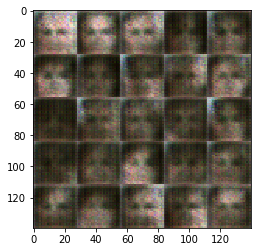

Epoch 1/1... Discriminator Loss: 1.3397... Generator Loss: 2.9660
Epoch 1/1... Discriminator Loss: 1.5183... Generator Loss: 0.5054
Epoch 1/1... Discriminator Loss: 1.4152... Generator Loss: 0.5863
Epoch 1/1... Discriminator Loss: 1.2826... Generator Loss: 1.2977
Epoch 1/1... Discriminator Loss: 1.0586... Generator Loss: 1.1442
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 2.3658... Generator Loss: 0.1876
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 0.9198
Epoch 1/1... Discriminator Loss: 1.6807... Generator Loss: 0.5152
Epoch 1/1... Discriminator Loss: 1.3798... Generator Loss: 0.8694


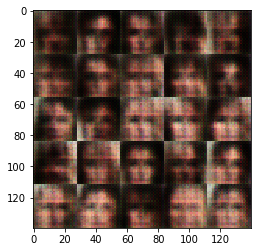

Epoch 1/1... Discriminator Loss: 1.1552... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 1.3652
Epoch 1/1... Discriminator Loss: 1.0926... Generator Loss: 0.7710
Epoch 1/1... Discriminator Loss: 1.0735... Generator Loss: 1.3430
Epoch 1/1... Discriminator Loss: 1.3258... Generator Loss: 0.6214
Epoch 1/1... Discriminator Loss: 1.2069... Generator Loss: 1.5235
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.2061
Epoch 1/1... Discriminator Loss: 0.9422... Generator Loss: 1.2865
Epoch 1/1... Discriminator Loss: 1.0335... Generator Loss: 1.6396
Epoch 1/1... Discriminator Loss: 0.9987... Generator Loss: 0.9751


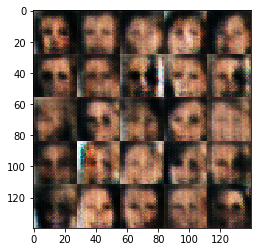

Epoch 1/1... Discriminator Loss: 0.9261... Generator Loss: 1.0271
Epoch 1/1... Discriminator Loss: 1.3085... Generator Loss: 0.9928
Epoch 1/1... Discriminator Loss: 1.3131... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.3936... Generator Loss: 0.6609
Epoch 1/1... Discriminator Loss: 1.3379... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 0.9726... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 1.0869... Generator Loss: 1.9816
Epoch 1/1... Discriminator Loss: 1.2271... Generator Loss: 0.9566
Epoch 1/1... Discriminator Loss: 1.7516... Generator Loss: 3.2552
Epoch 1/1... Discriminator Loss: 1.2193... Generator Loss: 0.8838


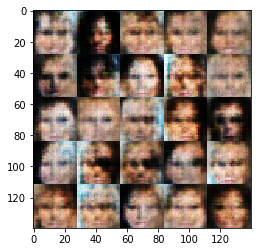

Epoch 1/1... Discriminator Loss: 1.1694... Generator Loss: 0.8055
Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.1934
Epoch 1/1... Discriminator Loss: 1.7195... Generator Loss: 0.4008
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 1.2662... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 0.9843
Epoch 1/1... Discriminator Loss: 1.1840... Generator Loss: 1.1074
Epoch 1/1... Discriminator Loss: 1.3286... Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 1.2094... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.8079... Generator Loss: 3.1485


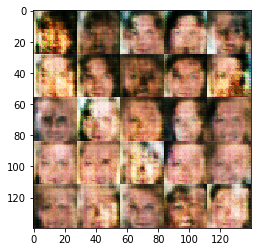

Epoch 1/1... Discriminator Loss: 1.0015... Generator Loss: 1.5475
Epoch 1/1... Discriminator Loss: 0.9980... Generator Loss: 1.2496
Epoch 1/1... Discriminator Loss: 1.3669... Generator Loss: 1.9078
Epoch 1/1... Discriminator Loss: 1.0543... Generator Loss: 2.1979
Epoch 1/1... Discriminator Loss: 1.1345... Generator Loss: 1.1511
Epoch 1/1... Discriminator Loss: 0.9636... Generator Loss: 1.2516
Epoch 1/1... Discriminator Loss: 1.2200... Generator Loss: 1.1155
Epoch 1/1... Discriminator Loss: 1.3957... Generator Loss: 2.2088
Epoch 1/1... Discriminator Loss: 1.5757... Generator Loss: 0.4992
Epoch 1/1... Discriminator Loss: 1.4140... Generator Loss: 0.5656


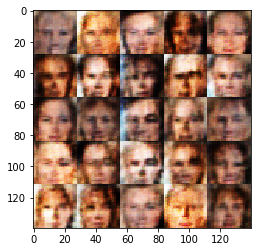

Epoch 1/1... Discriminator Loss: 1.3151... Generator Loss: 0.5960
Epoch 1/1... Discriminator Loss: 1.2083... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 1.7432... Generator Loss: 0.3334
Epoch 1/1... Discriminator Loss: 1.1660... Generator Loss: 0.8457
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 1.1432
Epoch 1/1... Discriminator Loss: 1.1165... Generator Loss: 0.8350
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 1.3188
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.0832... Generator Loss: 0.9404


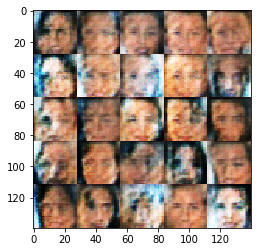

Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 1.1405
Epoch 1/1... Discriminator Loss: 1.1781... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.1174... Generator Loss: 0.7527
Epoch 1/1... Discriminator Loss: 1.0634... Generator Loss: 1.4175
Epoch 1/1... Discriminator Loss: 1.4184... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 1.0540
Epoch 1/1... Discriminator Loss: 1.1182... Generator Loss: 1.3060
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.7294
Epoch 1/1... Discriminator Loss: 1.3646... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.1635... Generator Loss: 0.8546


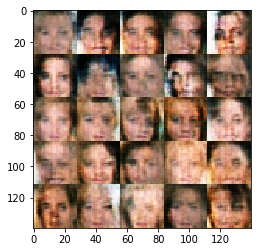

Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 0.9906
Epoch 1/1... Discriminator Loss: 1.0809... Generator Loss: 1.0706
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 0.9537
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 1.0966
Epoch 1/1... Discriminator Loss: 1.0344... Generator Loss: 1.1493
Epoch 1/1... Discriminator Loss: 1.3845... Generator Loss: 0.6168
Epoch 1/1... Discriminator Loss: 1.0875... Generator Loss: 1.1608
Epoch 1/1... Discriminator Loss: 1.3624... Generator Loss: 0.6001
Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 1.6145
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.8317


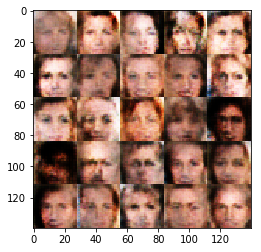

Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 0.8690
Epoch 1/1... Discriminator Loss: 1.2167... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 1.2171
Epoch 1/1... Discriminator Loss: 1.1228... Generator Loss: 0.9920
Epoch 1/1... Discriminator Loss: 1.1213... Generator Loss: 0.8856
Epoch 1/1... Discriminator Loss: 1.2558... Generator Loss: 0.9355
Epoch 1/1... Discriminator Loss: 1.1368... Generator Loss: 1.1891
Epoch 1/1... Discriminator Loss: 1.5797... Generator Loss: 0.4792
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.6292
Epoch 1/1... Discriminator Loss: 1.1686... Generator Loss: 0.8195


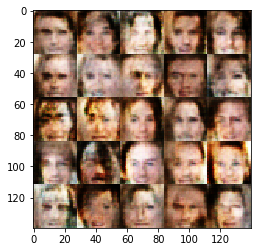

Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 1.0486
Epoch 1/1... Discriminator Loss: 1.4409... Generator Loss: 0.5150
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.9879
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 1.2060
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 1.8651
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.9977
Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 1.0599
Epoch 1/1... Discriminator Loss: 1.0164... Generator Loss: 1.3874
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.2536... Generator Loss: 1.1131


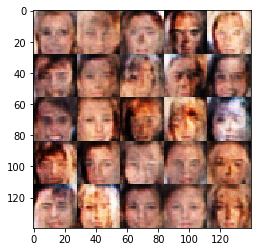

Epoch 1/1... Discriminator Loss: 1.0709... Generator Loss: 0.9810
Epoch 1/1... Discriminator Loss: 1.0959... Generator Loss: 1.1366
Epoch 1/1... Discriminator Loss: 1.0975... Generator Loss: 1.3460
Epoch 1/1... Discriminator Loss: 1.5370... Generator Loss: 0.4335
Epoch 1/1... Discriminator Loss: 1.1407... Generator Loss: 0.8357
Epoch 1/1... Discriminator Loss: 0.9068... Generator Loss: 1.3542
Epoch 1/1... Discriminator Loss: 1.1205... Generator Loss: 1.3725
Epoch 1/1... Discriminator Loss: 1.0451... Generator Loss: 1.1201
Epoch 1/1... Discriminator Loss: 1.0338... Generator Loss: 1.5761
Epoch 1/1... Discriminator Loss: 1.1095... Generator Loss: 0.9893


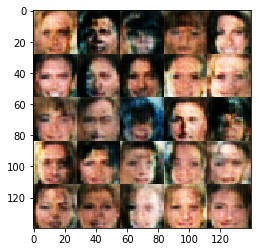

Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 0.8814
Epoch 1/1... Discriminator Loss: 1.4866... Generator Loss: 0.4799
Epoch 1/1... Discriminator Loss: 1.1953... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.3649... Generator Loss: 0.6561
Epoch 1/1... Discriminator Loss: 1.1243... Generator Loss: 0.8875
Epoch 1/1... Discriminator Loss: 1.4076... Generator Loss: 0.5114
Epoch 1/1... Discriminator Loss: 1.2788... Generator Loss: 2.2908
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 1.2335
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.5417
Epoch 1/1... Discriminator Loss: 1.0318... Generator Loss: 1.2088


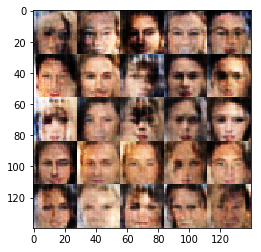

Epoch 1/1... Discriminator Loss: 1.1057... Generator Loss: 0.9535
Epoch 1/1... Discriminator Loss: 1.1445... Generator Loss: 0.9155
Epoch 1/1... Discriminator Loss: 1.2301... Generator Loss: 2.2951
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 1.1189
Epoch 1/1... Discriminator Loss: 1.3555... Generator Loss: 0.7773
Epoch 1/1... Discriminator Loss: 1.2013... Generator Loss: 0.7144
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.5743
Epoch 1/1... Discriminator Loss: 0.9794... Generator Loss: 1.0998
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 1.2668
Epoch 1/1... Discriminator Loss: 1.5329... Generator Loss: 1.1998


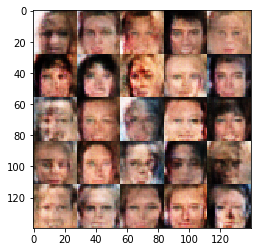

Epoch 1/1... Discriminator Loss: 1.1517... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.1176... Generator Loss: 0.8714
Epoch 1/1... Discriminator Loss: 1.2760... Generator Loss: 0.7830
Epoch 1/1... Discriminator Loss: 1.1328... Generator Loss: 1.7738
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 0.7352
Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 1.9113
Epoch 1/1... Discriminator Loss: 1.2150... Generator Loss: 0.7619
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.2022... Generator Loss: 1.1737
Epoch 1/1... Discriminator Loss: 1.1173... Generator Loss: 0.8807


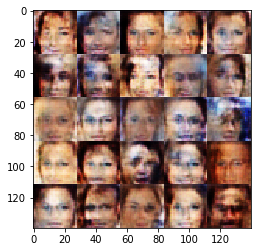

Epoch 1/1... Discriminator Loss: 1.1507... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.7797
Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 0.7731
Epoch 1/1... Discriminator Loss: 1.3777... Generator Loss: 0.5783
Epoch 1/1... Discriminator Loss: 1.0939... Generator Loss: 0.7835
Epoch 1/1... Discriminator Loss: 1.4523... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.3621... Generator Loss: 0.5347
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.7161
Epoch 1/1... Discriminator Loss: 1.3279... Generator Loss: 1.5320
Epoch 1/1... Discriminator Loss: 1.1937... Generator Loss: 0.7043


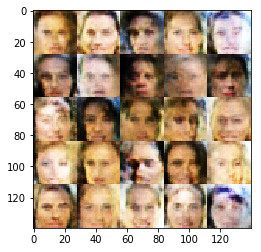

Epoch 1/1... Discriminator Loss: 1.2747... Generator Loss: 0.6047
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.7080
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 1.0223
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 0.7842
Epoch 1/1... Discriminator Loss: 1.1274... Generator Loss: 0.9635
Epoch 1/1... Discriminator Loss: 1.1806... Generator Loss: 0.7962
Epoch 1/1... Discriminator Loss: 1.2209... Generator Loss: 0.6665
Epoch 1/1... Discriminator Loss: 1.1435... Generator Loss: 1.2519
Epoch 1/1... Discriminator Loss: 1.1062... Generator Loss: 1.3365
Epoch 1/1... Discriminator Loss: 1.2958... Generator Loss: 1.7932


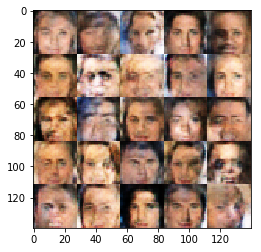

Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.6916
Epoch 1/1... Discriminator Loss: 1.1494... Generator Loss: 0.8962
Epoch 1/1... Discriminator Loss: 1.1911... Generator Loss: 1.0087
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 1.0177
Epoch 1/1... Discriminator Loss: 1.1470... Generator Loss: 0.7916
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.9089
Epoch 1/1... Discriminator Loss: 1.1234... Generator Loss: 0.8908
Epoch 1/1... Discriminator Loss: 1.0980... Generator Loss: 0.8998
Epoch 1/1... Discriminator Loss: 1.1545... Generator Loss: 0.9237
Epoch 1/1... Discriminator Loss: 1.2849... Generator Loss: 0.6636


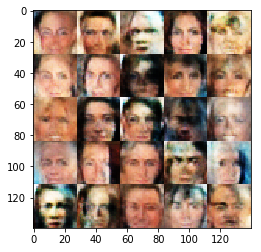

Epoch 1/1... Discriminator Loss: 1.0014... Generator Loss: 1.0947
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 0.9674
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 1.0866... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.1566... Generator Loss: 1.4828
Epoch 1/1... Discriminator Loss: 1.1612... Generator Loss: 0.8588
Epoch 1/1... Discriminator Loss: 0.9765... Generator Loss: 0.9795
Epoch 1/1... Discriminator Loss: 1.1767... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 1.8088... Generator Loss: 0.3175


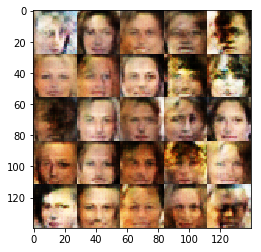

Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 1.1549
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.1151
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 1.7202
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.3396
Epoch 1/1... Discriminator Loss: 1.3489... Generator Loss: 0.5860
Epoch 1/1... Discriminator Loss: 1.0105... Generator Loss: 0.9797
Epoch 1/1... Discriminator Loss: 1.1859... Generator Loss: 0.9300
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 0.6253
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.7195


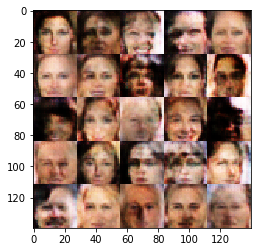

Epoch 1/1... Discriminator Loss: 1.1203... Generator Loss: 0.7562
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 0.7823
Epoch 1/1... Discriminator Loss: 1.2708... Generator Loss: 0.7552
Epoch 1/1... Discriminator Loss: 1.2336... Generator Loss: 0.6735
Epoch 1/1... Discriminator Loss: 1.4588... Generator Loss: 0.4669
Epoch 1/1... Discriminator Loss: 1.1003... Generator Loss: 1.0643
Epoch 1/1... Discriminator Loss: 1.2563... Generator Loss: 0.8203
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 1.3632
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 0.9697
Epoch 1/1... Discriminator Loss: 1.2070... Generator Loss: 0.8669


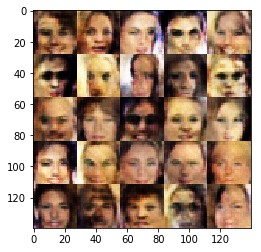

Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.8390
Epoch 1/1... Discriminator Loss: 1.3077... Generator Loss: 0.7431
Epoch 1/1... Discriminator Loss: 1.1583... Generator Loss: 1.1910
Epoch 1/1... Discriminator Loss: 1.4871... Generator Loss: 0.4886
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 1.8414
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.9079
Epoch 1/1... Discriminator Loss: 1.2557... Generator Loss: 1.5766
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 1.2391... Generator Loss: 0.7059
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6845


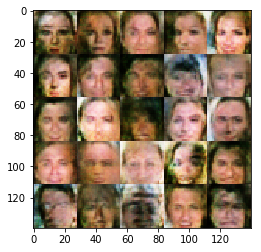

Epoch 1/1... Discriminator Loss: 1.0701... Generator Loss: 1.0735
Epoch 1/1... Discriminator Loss: 1.5358... Generator Loss: 0.4763
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 1.5139
Epoch 1/1... Discriminator Loss: 1.3955... Generator Loss: 0.5228
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.6359
Epoch 1/1... Discriminator Loss: 1.2573... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.4789... Generator Loss: 0.4848
Epoch 1/1... Discriminator Loss: 0.9075... Generator Loss: 1.7943
Epoch 1/1... Discriminator Loss: 0.9339... Generator Loss: 1.1083
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.6232


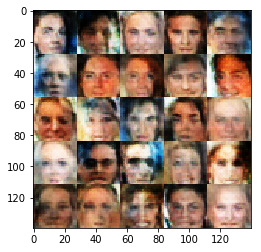

Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 1.0486... Generator Loss: 1.0978
Epoch 1/1... Discriminator Loss: 1.2148... Generator Loss: 0.9623
Epoch 1/1... Discriminator Loss: 1.1324... Generator Loss: 0.8444
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 1.1875
Epoch 1/1... Discriminator Loss: 0.9861... Generator Loss: 1.1400
Epoch 1/1... Discriminator Loss: 1.4851... Generator Loss: 0.4397
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 1.1087
Epoch 1/1... Discriminator Loss: 1.2385... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.0874... Generator Loss: 1.1845


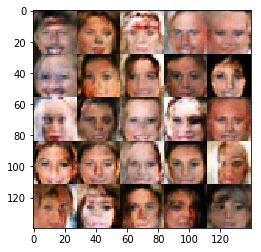

Epoch 1/1... Discriminator Loss: 1.5467... Generator Loss: 0.4187
Epoch 1/1... Discriminator Loss: 1.0751... Generator Loss: 1.9049
Epoch 1/1... Discriminator Loss: 1.3532... Generator Loss: 0.5901
Epoch 1/1... Discriminator Loss: 0.9834... Generator Loss: 1.5337
Epoch 1/1... Discriminator Loss: 1.0756... Generator Loss: 0.8897
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.7739
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.9048
Epoch 1/1... Discriminator Loss: 0.9438... Generator Loss: 1.4959
Epoch 1/1... Discriminator Loss: 1.7238... Generator Loss: 0.3386
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 1.0290


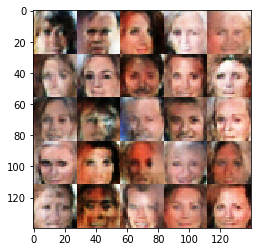

Epoch 1/1... Discriminator Loss: 0.9404... Generator Loss: 1.2575
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.7349
Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 1.3318
Epoch 1/1... Discriminator Loss: 1.3010... Generator Loss: 0.6421
Epoch 1/1... Discriminator Loss: 1.1941... Generator Loss: 1.6750
Epoch 1/1... Discriminator Loss: 0.8948... Generator Loss: 1.3688
Epoch 1/1... Discriminator Loss: 1.4421... Generator Loss: 0.5136
Epoch 1/1... Discriminator Loss: 1.0582... Generator Loss: 0.8121
Epoch 1/1... Discriminator Loss: 1.0214... Generator Loss: 1.5812
Epoch 1/1... Discriminator Loss: 1.0008... Generator Loss: 1.1233


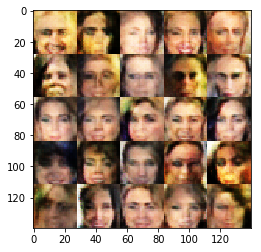

Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.4678
Epoch 1/1... Discriminator Loss: 1.2867... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.0989... Generator Loss: 1.0552
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 1.0260
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.8964
Epoch 1/1... Discriminator Loss: 1.1993... Generator Loss: 1.2615
Epoch 1/1... Discriminator Loss: 1.2507... Generator Loss: 2.2395
Epoch 1/1... Discriminator Loss: 1.1183... Generator Loss: 0.7861
Epoch 1/1... Discriminator Loss: 1.3863... Generator Loss: 0.5069


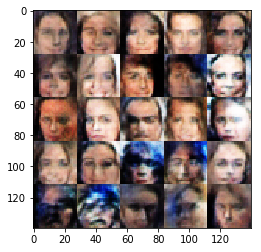

Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 1.2762... Generator Loss: 1.9576
Epoch 1/1... Discriminator Loss: 1.2800... Generator Loss: 0.5941
Epoch 1/1... Discriminator Loss: 1.0025... Generator Loss: 1.1285
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 1.3830
Epoch 1/1... Discriminator Loss: 1.3627... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 2.2425
Epoch 1/1... Discriminator Loss: 0.9937... Generator Loss: 1.2397
Epoch 1/1... Discriminator Loss: 1.1417... Generator Loss: 0.7896


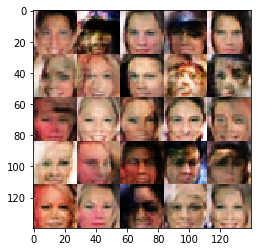

Epoch 1/1... Discriminator Loss: 1.2281... Generator Loss: 0.8904
Epoch 1/1... Discriminator Loss: 1.0910... Generator Loss: 0.9877
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.5166
Epoch 1/1... Discriminator Loss: 1.1235... Generator Loss: 1.2717
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.1822... Generator Loss: 0.7691
Epoch 1/1... Discriminator Loss: 1.1060... Generator Loss: 0.7661
Epoch 1/1... Discriminator Loss: 1.1248... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.1718... Generator Loss: 0.7310
Epoch 1/1... Discriminator Loss: 0.8963... Generator Loss: 1.6983


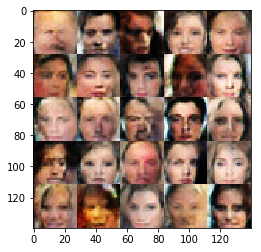

Epoch 1/1... Discriminator Loss: 1.0076... Generator Loss: 1.1265
Epoch 1/1... Discriminator Loss: 1.2410... Generator Loss: 1.6101
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 0.9331
Epoch 1/1... Discriminator Loss: 1.0203... Generator Loss: 1.0894
Epoch 1/1... Discriminator Loss: 1.0191... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 1.1294... Generator Loss: 1.2515
Epoch 1/1... Discriminator Loss: 1.5674... Generator Loss: 0.4479
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 1.7385
Epoch 1/1... Discriminator Loss: 1.2396... Generator Loss: 0.8389
Epoch 1/1... Discriminator Loss: 1.5980... Generator Loss: 0.4245


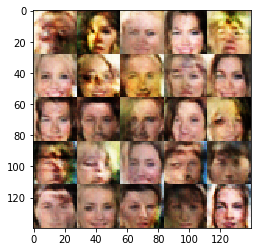

Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 0.8717
Epoch 1/1... Discriminator Loss: 1.2431... Generator Loss: 0.8883
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 0.7251
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 1.0264
Epoch 1/1... Discriminator Loss: 1.1269... Generator Loss: 1.0909
Epoch 1/1... Discriminator Loss: 1.4759... Generator Loss: 0.4809
Epoch 1/1... Discriminator Loss: 1.4549... Generator Loss: 0.5413
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 0.9318
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 1.0421


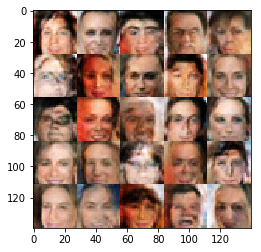

Epoch 1/1... Discriminator Loss: 1.0869... Generator Loss: 0.8426
Epoch 1/1... Discriminator Loss: 1.2008... Generator Loss: 0.6442
Epoch 1/1... Discriminator Loss: 1.4263... Generator Loss: 0.5657
Epoch 1/1... Discriminator Loss: 1.1405... Generator Loss: 1.5611
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 1.4348
Epoch 1/1... Discriminator Loss: 1.1893... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 1.2276... Generator Loss: 1.0033
Epoch 1/1... Discriminator Loss: 1.1284... Generator Loss: 1.2646
Epoch 1/1... Discriminator Loss: 1.2599... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.0288... Generator Loss: 1.4689


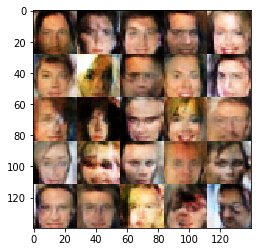

Epoch 1/1... Discriminator Loss: 1.0927... Generator Loss: 0.7671
Epoch 1/1... Discriminator Loss: 1.1294... Generator Loss: 1.5360
Epoch 1/1... Discriminator Loss: 1.2509... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.2149... Generator Loss: 0.9075
Epoch 1/1... Discriminator Loss: 1.1374... Generator Loss: 1.0222
Epoch 1/1... Discriminator Loss: 1.0999... Generator Loss: 0.9064
Epoch 1/1... Discriminator Loss: 1.0050... Generator Loss: 1.1111
Epoch 1/1... Discriminator Loss: 0.8963... Generator Loss: 1.1692
Epoch 1/1... Discriminator Loss: 1.5207... Generator Loss: 0.5454
Epoch 1/1... Discriminator Loss: 1.0765... Generator Loss: 1.0645


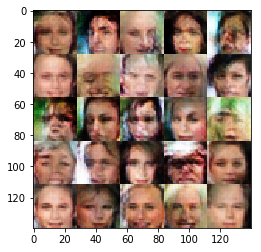

Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 0.7681
Epoch 1/1... Discriminator Loss: 1.4307... Generator Loss: 0.5071
Epoch 1/1... Discriminator Loss: 1.4563... Generator Loss: 0.5179
Epoch 1/1... Discriminator Loss: 1.2954... Generator Loss: 0.8444
Epoch 1/1... Discriminator Loss: 1.2989... Generator Loss: 0.8247
Epoch 1/1... Discriminator Loss: 1.2927... Generator Loss: 0.6198
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 1.0564
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.8398
Epoch 1/1... Discriminator Loss: 1.1042... Generator Loss: 1.0088
Epoch 1/1... Discriminator Loss: 1.2725... Generator Loss: 0.6143


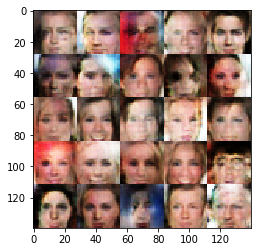

Epoch 1/1... Discriminator Loss: 1.3118... Generator Loss: 0.6252
Epoch 1/1... Discriminator Loss: 1.3113... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.2966... Generator Loss: 0.9281
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 0.9246
Epoch 1/1... Discriminator Loss: 1.5338... Generator Loss: 0.4404
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 1.0629
Epoch 1/1... Discriminator Loss: 1.1689... Generator Loss: 0.9311
Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 0.6723
Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 1.3528
Epoch 1/1... Discriminator Loss: 1.1509... Generator Loss: 0.8627


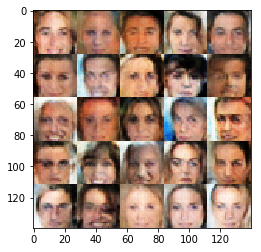

Epoch 1/1... Discriminator Loss: 1.2948... Generator Loss: 0.7509
Epoch 1/1... Discriminator Loss: 1.0941... Generator Loss: 0.9638
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.6776
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 0.6966
Epoch 1/1... Discriminator Loss: 1.3814... Generator Loss: 0.9051
Epoch 1/1... Discriminator Loss: 1.1217... Generator Loss: 1.2442
Epoch 1/1... Discriminator Loss: 1.1810... Generator Loss: 0.7234
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.8296
Epoch 1/1... Discriminator Loss: 0.9772... Generator Loss: 1.1187
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 0.6096


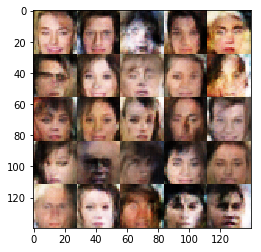

Epoch 1/1... Discriminator Loss: 1.0775... Generator Loss: 1.3353
Epoch 1/1... Discriminator Loss: 1.0665... Generator Loss: 1.0261
Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.7058
Epoch 1/1... Discriminator Loss: 1.1878... Generator Loss: 1.6487
Epoch 1/1... Discriminator Loss: 1.1862... Generator Loss: 1.0859
Epoch 1/1... Discriminator Loss: 1.2291... Generator Loss: 0.7971
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 1.0866
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.7322
Epoch 1/1... Discriminator Loss: 1.1373... Generator Loss: 1.0784
Epoch 1/1... Discriminator Loss: 1.1972... Generator Loss: 0.7979


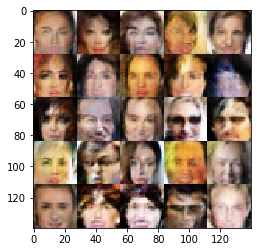

Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 1.1525
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 1.1478
Epoch 1/1... Discriminator Loss: 1.0199... Generator Loss: 1.0579
Epoch 1/1... Discriminator Loss: 1.2345... Generator Loss: 0.6547
Epoch 1/1... Discriminator Loss: 1.2328... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.5575
Epoch 1/1... Discriminator Loss: 1.1525... Generator Loss: 0.8918
Epoch 1/1... Discriminator Loss: 1.0430... Generator Loss: 0.8370
Epoch 1/1... Discriminator Loss: 1.1815... Generator Loss: 1.7164
Epoch 1/1... Discriminator Loss: 1.1555... Generator Loss: 0.9428


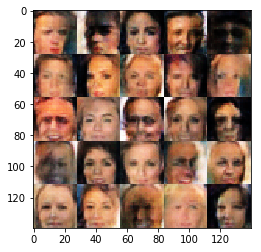

Epoch 1/1... Discriminator Loss: 1.1737... Generator Loss: 1.0080
Epoch 1/1... Discriminator Loss: 1.0989... Generator Loss: 0.9402
Epoch 1/1... Discriminator Loss: 1.3309... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.3130... Generator Loss: 0.5954
Epoch 1/1... Discriminator Loss: 1.3762... Generator Loss: 0.6948
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.7907
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 1.2183
Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 1.0030
Epoch 1/1... Discriminator Loss: 1.0495... Generator Loss: 1.0718


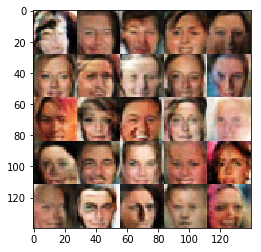

Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.1169... Generator Loss: 0.8914
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.7413
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.2123... Generator Loss: 0.9891
Epoch 1/1... Discriminator Loss: 1.1331... Generator Loss: 0.9307
Epoch 1/1... Discriminator Loss: 1.2196... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 0.9360
Epoch 1/1... Discriminator Loss: 1.0920... Generator Loss: 1.1836


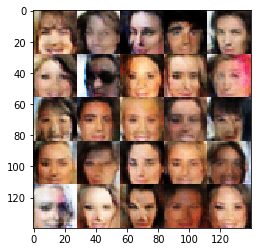

Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.5958
Epoch 1/1... Discriminator Loss: 1.0940... Generator Loss: 0.8723
Epoch 1/1... Discriminator Loss: 1.2502... Generator Loss: 0.7280
Epoch 1/1... Discriminator Loss: 1.0279... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.6886
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.5971
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 1.1821... Generator Loss: 0.9105
Epoch 1/1... Discriminator Loss: 1.3058... Generator Loss: 1.0091
Epoch 1/1... Discriminator Loss: 1.1200... Generator Loss: 0.9730


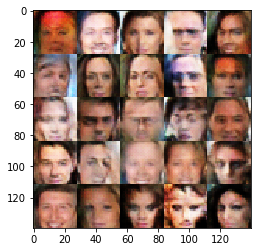

Epoch 1/1... Discriminator Loss: 1.1402... Generator Loss: 1.0749
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.7433
Epoch 1/1... Discriminator Loss: 1.0487... Generator Loss: 1.0533
Epoch 1/1... Discriminator Loss: 1.2321... Generator Loss: 0.6852
Epoch 1/1... Discriminator Loss: 1.0716... Generator Loss: 0.7343
Epoch 1/1... Discriminator Loss: 1.4493... Generator Loss: 0.4837
Epoch 1/1... Discriminator Loss: 1.0901... Generator Loss: 0.9584
Epoch 1/1... Discriminator Loss: 1.6220... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.0372... Generator Loss: 1.3080
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.6247


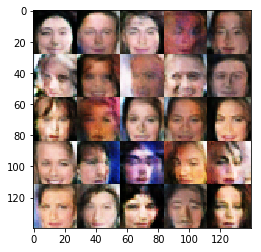

Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.8607
Epoch 1/1... Discriminator Loss: 1.2238... Generator Loss: 0.7510
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.8532
Epoch 1/1... Discriminator Loss: 1.4866... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.1136... Generator Loss: 0.8393
Epoch 1/1... Discriminator Loss: 1.2878... Generator Loss: 0.5704
Epoch 1/1... Discriminator Loss: 1.3206... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.0593... Generator Loss: 1.0691
Epoch 1/1... Discriminator Loss: 1.2688... Generator Loss: 1.0468
Epoch 1/1... Discriminator Loss: 1.2403... Generator Loss: 0.7231


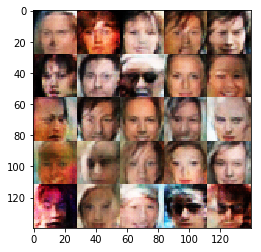

Epoch 1/1... Discriminator Loss: 1.1761... Generator Loss: 0.7882
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 1.1241
Epoch 1/1... Discriminator Loss: 1.2741... Generator Loss: 0.8649
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.0464... Generator Loss: 1.1557
Epoch 1/1... Discriminator Loss: 1.2635... Generator Loss: 0.6806
Epoch 1/1... Discriminator Loss: 1.1678... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 1.4779
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.5144
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 1.4054


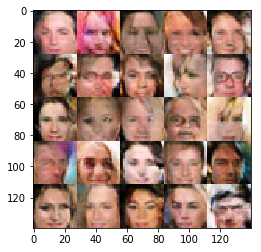

Epoch 1/1... Discriminator Loss: 1.0718... Generator Loss: 1.2849
Epoch 1/1... Discriminator Loss: 1.1611... Generator Loss: 0.9709
Epoch 1/1... Discriminator Loss: 1.6931... Generator Loss: 0.3317
Epoch 1/1... Discriminator Loss: 0.9942... Generator Loss: 1.3673
Epoch 1/1... Discriminator Loss: 1.2030... Generator Loss: 0.9322
Epoch 1/1... Discriminator Loss: 1.0897... Generator Loss: 0.9972
Epoch 1/1... Discriminator Loss: 1.2519... Generator Loss: 0.7137
Epoch 1/1... Discriminator Loss: 1.2187... Generator Loss: 0.7870
Epoch 1/1... Discriminator Loss: 1.1424... Generator Loss: 0.9386
Epoch 1/1... Discriminator Loss: 1.3417... Generator Loss: 1.2414


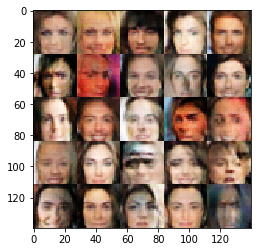

Epoch 1/1... Discriminator Loss: 1.0450... Generator Loss: 1.0227
Epoch 1/1... Discriminator Loss: 1.1782... Generator Loss: 0.9924
Epoch 1/1... Discriminator Loss: 1.1222... Generator Loss: 0.7829
Epoch 1/1... Discriminator Loss: 1.0802... Generator Loss: 0.8980
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 1.0719
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 1.0850
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 0.6345
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.8458
Epoch 1/1... Discriminator Loss: 1.3727... Generator Loss: 1.1755


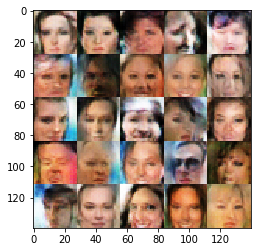

Epoch 1/1... Discriminator Loss: 1.5373... Generator Loss: 0.4446
Epoch 1/1... Discriminator Loss: 1.1411... Generator Loss: 1.0344
Epoch 1/1... Discriminator Loss: 1.4204... Generator Loss: 0.6126
Epoch 1/1... Discriminator Loss: 1.0022... Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.7585
Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.4663
Epoch 1/1... Discriminator Loss: 1.1447... Generator Loss: 0.8573
Epoch 1/1... Discriminator Loss: 1.1962... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.3717... Generator Loss: 0.6037
Epoch 1/1... Discriminator Loss: 1.1014... Generator Loss: 1.3533


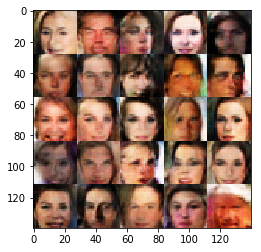

Epoch 1/1... Discriminator Loss: 1.4314... Generator Loss: 0.5198
Epoch 1/1... Discriminator Loss: 1.0857... Generator Loss: 1.1250
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.9828
Epoch 1/1... Discriminator Loss: 1.0988... Generator Loss: 1.1856
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6425
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 1.1719
Epoch 1/1... Discriminator Loss: 1.1193... Generator Loss: 0.9609
Epoch 1/1... Discriminator Loss: 1.2071... Generator Loss: 0.7898
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.7897
Epoch 1/1... Discriminator Loss: 1.1073... Generator Loss: 0.8360


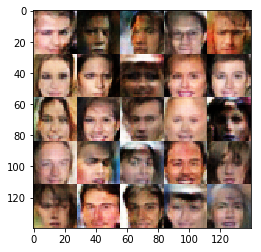

Epoch 1/1... Discriminator Loss: 1.1437... Generator Loss: 0.7782
Epoch 1/1... Discriminator Loss: 1.1568... Generator Loss: 1.0483
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 0.8587
Epoch 1/1... Discriminator Loss: 1.2235... Generator Loss: 0.6806
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.8078
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.5523
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 0.9626
Epoch 1/1... Discriminator Loss: 1.3271... Generator Loss: 0.8851
Epoch 1/1... Discriminator Loss: 1.1370... Generator Loss: 1.1316
Epoch 1/1... Discriminator Loss: 1.0628... Generator Loss: 0.9026


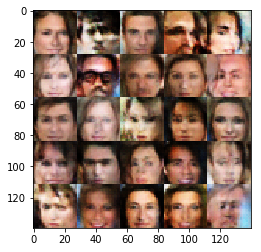

Epoch 1/1... Discriminator Loss: 1.2896... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.1140... Generator Loss: 0.8891
Epoch 1/1... Discriminator Loss: 1.1926... Generator Loss: 0.9325
Epoch 1/1... Discriminator Loss: 1.2846... Generator Loss: 0.7616
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.1558... Generator Loss: 0.8858
Epoch 1/1... Discriminator Loss: 1.1629... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.1292... Generator Loss: 0.7795
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 1.9388
Epoch 1/1... Discriminator Loss: 1.4402... Generator Loss: 0.5423


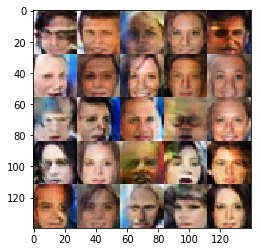

Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 1.1351
Epoch 1/1... Discriminator Loss: 1.2007... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.2031... Generator Loss: 0.9905
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.8191
Epoch 1/1... Discriminator Loss: 0.9528... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 1.1775
Epoch 1/1... Discriminator Loss: 1.3719... Generator Loss: 0.7142
Epoch 1/1... Discriminator Loss: 1.2803... Generator Loss: 0.7559
Epoch 1/1... Discriminator Loss: 1.4125... Generator Loss: 0.5585


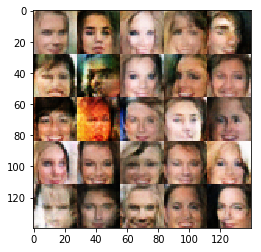

Epoch 1/1... Discriminator Loss: 1.0690... Generator Loss: 1.6422
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 0.6294
Epoch 1/1... Discriminator Loss: 1.5400... Generator Loss: 0.6013
Epoch 1/1... Discriminator Loss: 1.3832... Generator Loss: 0.6267
Epoch 1/1... Discriminator Loss: 1.1909... Generator Loss: 0.8443
Epoch 1/1... Discriminator Loss: 1.2061... Generator Loss: 0.7415
Epoch 1/1... Discriminator Loss: 1.3380... Generator Loss: 1.0590
Epoch 1/1... Discriminator Loss: 1.4390... Generator Loss: 0.4761
Epoch 1/1... Discriminator Loss: 1.2799... Generator Loss: 0.8338


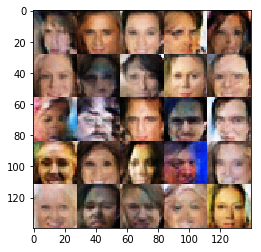

Epoch 1/1... Discriminator Loss: 1.4318... Generator Loss: 0.5091
Epoch 1/1... Discriminator Loss: 1.1255... Generator Loss: 1.1613
Epoch 1/1... Discriminator Loss: 1.3488... Generator Loss: 0.6474
Epoch 1/1... Discriminator Loss: 1.2712... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.0014... Generator Loss: 1.0853
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.2363... Generator Loss: 0.7257
Epoch 1/1... Discriminator Loss: 1.1215... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.1339... Generator Loss: 0.8898
Epoch 1/1... Discriminator Loss: 0.7919... Generator Loss: 1.8641


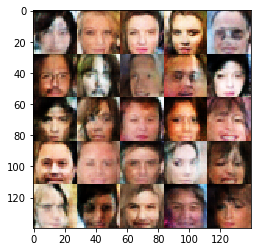

Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 1.1010
Epoch 1/1... Discriminator Loss: 1.3099... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 1.1574... Generator Loss: 0.8277
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.7727
Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.5519
Epoch 1/1... Discriminator Loss: 1.0538... Generator Loss: 1.2773
Epoch 1/1... Discriminator Loss: 1.2999... Generator Loss: 0.6437
Epoch 1/1... Discriminator Loss: 1.1117... Generator Loss: 1.1629
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.6688


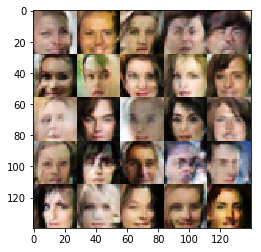

Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 1.1160
Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.5484
Epoch 1/1... Discriminator Loss: 1.4878... Generator Loss: 0.4680
Epoch 1/1... Discriminator Loss: 1.1771... Generator Loss: 0.9971
Epoch 1/1... Discriminator Loss: 1.6096... Generator Loss: 0.3839
Epoch 1/1... Discriminator Loss: 1.3638... Generator Loss: 0.6346
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 0.9532
Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.8187
Epoch 1/1... Discriminator Loss: 1.1906... Generator Loss: 1.1459
Epoch 1/1... Discriminator Loss: 1.2740... Generator Loss: 0.7949


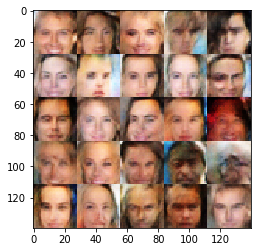

Epoch 1/1... Discriminator Loss: 1.1380... Generator Loss: 1.0154
Epoch 1/1... Discriminator Loss: 1.2469... Generator Loss: 0.8749
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 1.0952
Epoch 1/1... Discriminator Loss: 1.3372... Generator Loss: 0.8802
Epoch 1/1... Discriminator Loss: 1.1024... Generator Loss: 0.9541
Epoch 1/1... Discriminator Loss: 1.1831... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 0.9573
Epoch 1/1... Discriminator Loss: 1.2560... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.2040... Generator Loss: 0.8544
Epoch 1/1... Discriminator Loss: 1.2686... Generator Loss: 1.5461


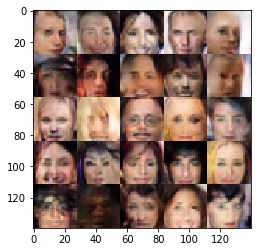

Epoch 1/1... Discriminator Loss: 1.4371... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.9748
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 0.8033
Epoch 1/1... Discriminator Loss: 1.0030... Generator Loss: 0.9728
Epoch 1/1... Discriminator Loss: 1.1935... Generator Loss: 0.7293
Epoch 1/1... Discriminator Loss: 1.2467... Generator Loss: 1.0832
Epoch 1/1... Discriminator Loss: 1.2761... Generator Loss: 0.6940
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.7241
Epoch 1/1... Discriminator Loss: 1.1280... Generator Loss: 0.7407
Epoch 1/1... Discriminator Loss: 1.5360... Generator Loss: 0.4397


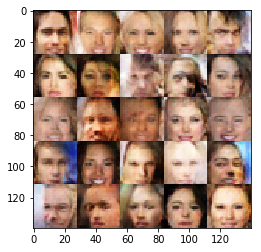

Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.9912
Epoch 1/1... Discriminator Loss: 0.8743... Generator Loss: 1.3669
Epoch 1/1... Discriminator Loss: 1.1587... Generator Loss: 1.0156
Epoch 1/1... Discriminator Loss: 1.0921... Generator Loss: 1.1050
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 1.3471
Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.8760
Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.9199
Epoch 1/1... Discriminator Loss: 1.1864... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.2699... Generator Loss: 0.6733


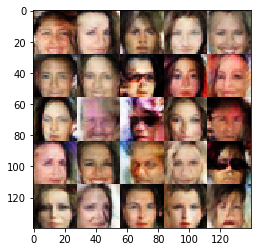

Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.7109
Epoch 1/1... Discriminator Loss: 1.3064... Generator Loss: 0.7432
Epoch 1/1... Discriminator Loss: 1.0829... Generator Loss: 1.2777
Epoch 1/1... Discriminator Loss: 1.2854... Generator Loss: 0.6191
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6467
Epoch 1/1... Discriminator Loss: 1.3376... Generator Loss: 1.0250
Epoch 1/1... Discriminator Loss: 1.1975... Generator Loss: 0.7396
Epoch 1/1... Discriminator Loss: 1.2568... Generator Loss: 0.6059
Epoch 1/1... Discriminator Loss: 1.2801... Generator Loss: 0.7790
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 0.9323


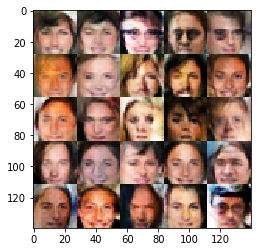

Epoch 1/1... Discriminator Loss: 1.2148... Generator Loss: 0.8892
Epoch 1/1... Discriminator Loss: 1.1514... Generator Loss: 1.1608
Epoch 1/1... Discriminator Loss: 1.9177... Generator Loss: 0.2957
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 0.8454
Epoch 1/1... Discriminator Loss: 1.1755... Generator Loss: 0.9530
Epoch 1/1... Discriminator Loss: 1.3411... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.3116... Generator Loss: 1.1000
Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 0.9457
Epoch 1/1... Discriminator Loss: 0.9708... Generator Loss: 1.1421
Epoch 1/1... Discriminator Loss: 1.2602... Generator Loss: 0.7446


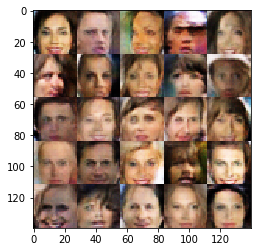

Epoch 1/1... Discriminator Loss: 1.2616... Generator Loss: 1.0145
Epoch 1/1... Discriminator Loss: 1.1250... Generator Loss: 0.8509
Epoch 1/1... Discriminator Loss: 1.5618... Generator Loss: 0.4197
Epoch 1/1... Discriminator Loss: 1.0483... Generator Loss: 1.0633
Epoch 1/1... Discriminator Loss: 1.1734... Generator Loss: 0.8144
Epoch 1/1... Discriminator Loss: 1.3045... Generator Loss: 0.7034
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 1.1192
Epoch 1/1... Discriminator Loss: 1.3885... Generator Loss: 0.5110
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.7999
Epoch 1/1... Discriminator Loss: 1.0663... Generator Loss: 0.8442


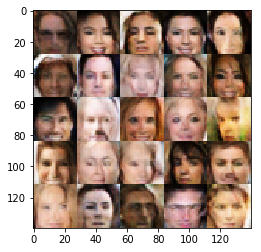

Epoch 1/1... Discriminator Loss: 1.2306... Generator Loss: 0.9097
Epoch 1/1... Discriminator Loss: 1.1041... Generator Loss: 1.1398
Epoch 1/1... Discriminator Loss: 1.3300... Generator Loss: 0.6524
Epoch 1/1... Discriminator Loss: 1.2374... Generator Loss: 0.6647
Epoch 1/1... Discriminator Loss: 1.2097... Generator Loss: 0.9545
Epoch 1/1... Discriminator Loss: 1.2475... Generator Loss: 0.9172
Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.5658
Epoch 1/1... Discriminator Loss: 1.2771... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 1.0075


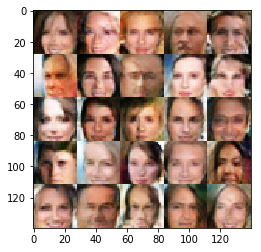

Epoch 1/1... Discriminator Loss: 0.9300... Generator Loss: 1.1643
Epoch 1/1... Discriminator Loss: 1.5577... Generator Loss: 0.3990
Epoch 1/1... Discriminator Loss: 1.1631... Generator Loss: 0.8575
Epoch 1/1... Discriminator Loss: 1.2451... Generator Loss: 0.8395
Epoch 1/1... Discriminator Loss: 1.5031... Generator Loss: 0.4738
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 0.7000
Epoch 1/1... Discriminator Loss: 1.2171... Generator Loss: 0.6716
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.1521... Generator Loss: 0.8157
Epoch 1/1... Discriminator Loss: 1.2997... Generator Loss: 0.7214


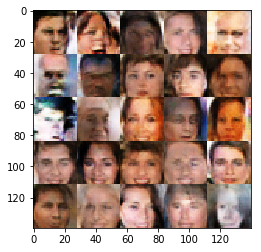

Epoch 1/1... Discriminator Loss: 1.4518... Generator Loss: 0.4922
Epoch 1/1... Discriminator Loss: 1.1532... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.2179... Generator Loss: 0.7877


In [13]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5
alpha = 0.2
smooth = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。